In [1]:
import math
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
leg = np.array([
    [0, 0],
    [0, -1],
    [0, -2],
    [1, -2],
    [1, -3],
    [0, -3]
])

In [3]:
def midpoint(vec):
    vecT = vec.T
    minx, maxx = vecT[0].min(), vecT[0].max()
    miny, maxy = vecT[1].min(), vecT[1].max()
    return (np.array([minx, maxx]).mean(),
            np.array([miny, maxy]).mean())

def norm(vec):
    vecT = vec.T
    minx = vecT[0].min()
    miny = vecT[1].min()
    return vec - [minx, miny]

# https://gist.github.com/LyleScott/e36e08bfb23b1f87af68c9051f985302
def rotate_around_point_highperf(xy, radians, origin=(0, 0)):
    """Rotate a point around a given point.
    
    I call this the "high performance" version since we're caching some
    values that are needed >1 time. It's less readable than the previous
    function but it's faster.
    """
    xyT = xy.T
    x, y = xyT[0], xyT[1]
    offset_x, offset_y = origin
    adjusted_x = (x - offset_x)
    adjusted_y = (y - offset_y)
    cos_rad = math.cos(radians)
    sin_rad = math.sin(radians)
    qx = offset_x + cos_rad * adjusted_x + sin_rad * adjusted_y
    qy = offset_y + -sin_rad * adjusted_x + cos_rad * adjusted_y

    return np.stack([qx, qy]).T

def rotate(xy, radians, origin=None):
    if origin is None:
        origin = midpoint(xy)
    return rotate_around_point_highperf(xy, radians, origin)

In [4]:
leg2 = norm((rotate(leg, np.radians(45), (0,0)) / np.sqrt(2)) * 2)

In [5]:
def vec2graph(vec):
    G = nx.Graph()
    for i in range(len(vec)):
        if i == 0:
            continue
        e = (tuple(map(int, vec[i - 1].round())), tuple(map(int, vec[i].round())))
        G.add_edge(*e)
    return G

In [7]:
def graph_to_chains(G):
    start = list(G.nodes)[0]
    chains = []
    current_chain = []
    prev_node = None
    for n1, n2 in nx.dfs_edges(G, source=start):
        if prev_node is None or prev_node == n1:
            current_chain.append(n1)
            
        elif len(current_chain):
            current_chain.append(prev_node)
            chains.append(current_chain)
            current_chain = [n1]
            
        prev_node = n2

    if len(current_chain):
        if prev_node is not None:
            current_chain.append(prev_node)
        
        chains.append(current_chain)
    
    return chains

In [8]:
def show_pat(G, lw=10, wh=[10,10], color='white'):
    chains = graph_to_chains(G)
    plt.rcParams['figure.figsize'] = wh
    for chain in chains:
        xs = [n[0] for n in chain]
        ys = [n[1] for n in chain]
        plt.plot(xs, ys, lw=lw, color=color, solid_joinstyle='miter')
    
    plt.gca().set_facecolor("black")
    plt.show()

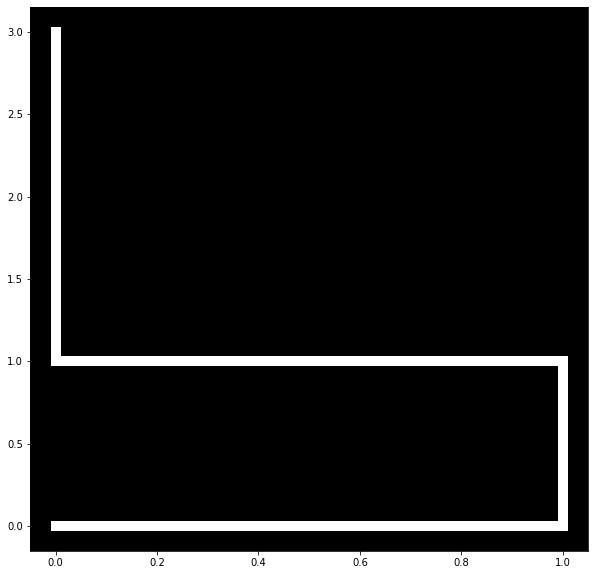

In [13]:
show_pat(vec2graph(norm(leg)))

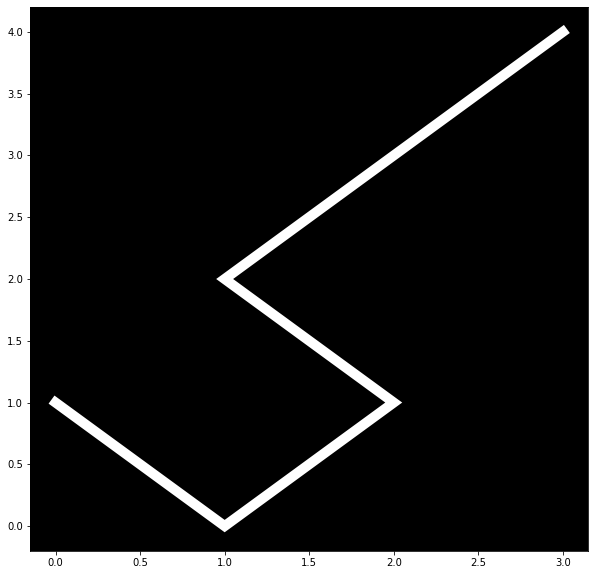

In [10]:
show_pat(vec2graph(leg2))

In [11]:
# debugging points
#plt.scatter(leg[:,0], leg[:,1])
#plt.show()

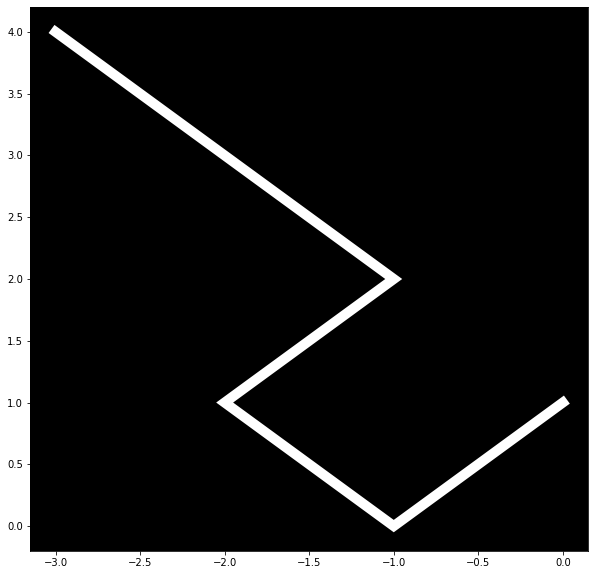

In [15]:
# horizontal mirror
show_pat(vec2graph(leg2 * [-1,1]))

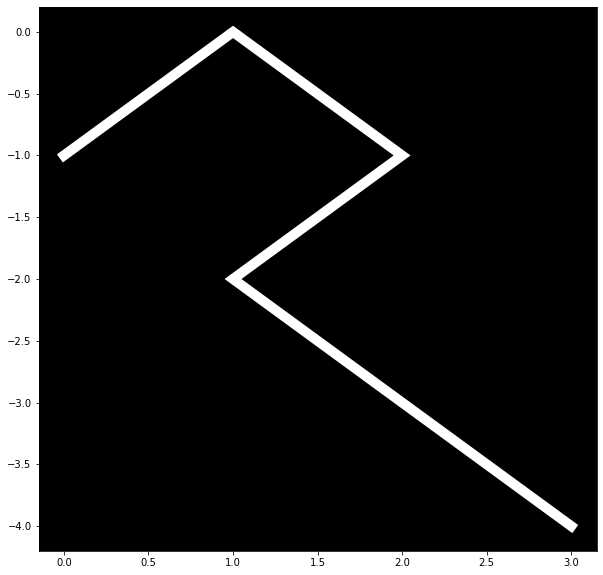

In [16]:
# vertical mirror
show_pat(vec2graph(leg2 * [1,-1]))

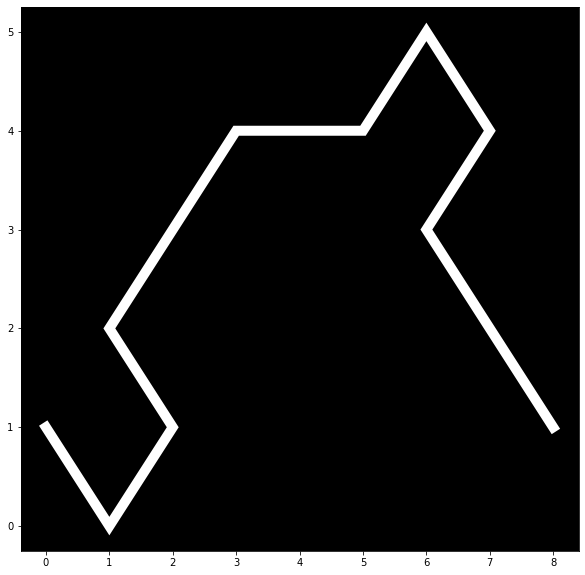

In [38]:
show_pat(vec2graph(np.vstack(
    [leg2 * [1,-1] + [5,5],
     leg2])))

In [40]:
leg2

array([[3., 4.],
       [2., 3.],
       [1., 2.],
       [2., 1.],
       [1., 0.],
       [0., 1.]])